In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r"C:\\Users\\Krishna Baraskar\\Downloads\\Social_Network_Ads.csv")
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [4]:
df.drop(columns={"User ID", "Gender"},inplace=True)

In [5]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


Train test split

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df.drop("Purchased",axis = 1), df["Purchased"],test_size = 0.25,random_state=0)

In [7]:
len(x_train),len(x_test),len(y_train),len(y_test)

(300, 100, 300, 100)

**StandardScaler**

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# train the parameter for standraztion
scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [9]:
x_test_scaled

array([[-0.80480212,  0.50496393],
       [-0.01254409, -0.5677824 ],
       [-0.30964085,  0.1570462 ],
       [-0.80480212,  0.27301877],
       [-0.30964085, -0.5677824 ],
       [-1.10189888, -1.43757673],
       [-0.70576986, -1.58254245],
       [-0.21060859,  2.15757314],
       [-1.99318916, -0.04590581],
       [ 0.8787462 , -0.77073441],
       [-0.80480212, -0.59677555],
       [-1.00286662, -0.42281668],
       [-0.11157634, -0.42281668],
       [ 0.08648817,  0.21503249],
       [-1.79512465,  0.47597078],
       [-0.60673761,  1.37475825],
       [-0.11157634,  0.21503249],
       [-1.89415691,  0.44697764],
       [ 1.67100423,  1.75166912],
       [-0.30964085, -1.37959044],
       [-0.30964085, -0.65476184],
       [ 0.8787462 ,  2.15757314],
       [ 0.28455268, -0.53878926],
       [ 0.8787462 ,  1.02684052],
       [-1.49802789, -1.20563157],
       [ 1.07681071,  2.07059371],
       [-1.00286662,  0.50496393],
       [-0.90383437,  0.30201192],
       [-0.11157634,

In [10]:
scaler.mean_

array([3.81266667e+01, 6.95833333e+04])

In [11]:
x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled,columns=x_test.columns)

In [12]:
x_test_scaled

,Age,EstimatedSalary
0,-0.804802,0.504964
1,-0.012544,-0.567782
2,-0.309641,0.157046
3,-0.804802,0.273019
4,-0.309641,-0.567782
...,...,...
95,-1.101899,0.765902
96,-1.498028,-0.190872
97,0.977778,-1.060666
98,0.977778,0.591943


In [13]:
x_train_scaled

,Age,EstimatedSalary
0,0.581649,-0.886707
1,-0.606738,1.461738
2,-0.012544,-0.567782
3,-0.606738,1.896635
4,1.373907,-1.408584
...,...,...
295,0.977778,-1.147645
296,-0.903834,-0.770734
297,-0.210609,-0.509796
298,-1.101899,-0.451810


In [14]:
round(x_train.describe(),2)

,Age,EstimatedSalary
count,300.00,300.00
mean,38.13,69583.33
std,10.11,34548.54
min,18.00,15000.00
25%,30.75,43000.00
50%,38.00,69500.00
75%,46.00,88000.00
max,60.00,150000.00


In [15]:
round(x_train_scaled.describe(),2)

,Age,EstimatedSalary
count,300.00,300.00
mean,0.00,0.00
std,1.00,1.00
min,-1.99,-1.58
25%,-0.73,-0.77
50%,-0.01,-0.00
75%,0.78,0.53
max,2.17,2.33


In feacture scaling after doing standardization our mean = 0 and std = 1

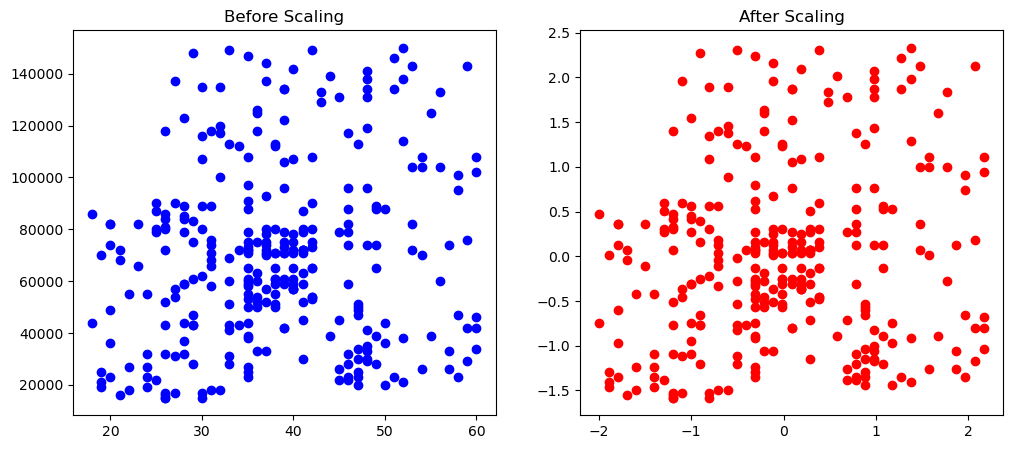

In [16]:
fig, (ax1,ax2) = plt.subplots(ncols = 2,figsize = (12,5))

ax1.scatter(x_train["Age"],x_train["EstimatedSalary"],c = "b")
ax1.set_title("Before Scaling")
ax2.scatter(x_train_scaled["Age"],x_train_scaled["EstimatedSalary"],c = "r")
ax2.set_title("After Scaling")
plt.show()

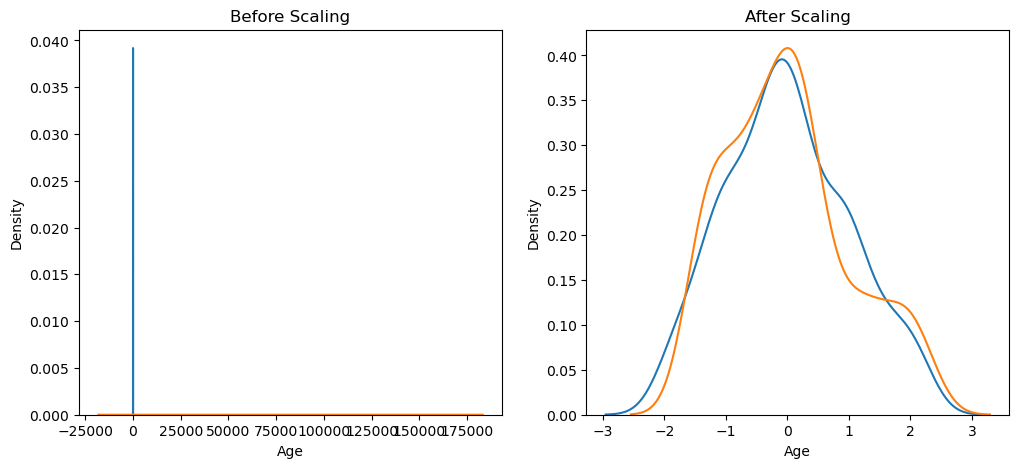

In [17]:
fig, (ax1,ax2) = plt.subplots(ncols = 2,figsize = (12,5))

# Before Scaling
ax1.set_title("Before Scaling")
sns.kdeplot(x_train["Age"], ax = ax1)
sns.kdeplot(x_train["EstimatedSalary"],ax = ax1)

# After Scaling
ax2.set_title("After Scaling")
sns.kdeplot(x_train_scaled["Age"],ax = ax2)
sns.kdeplot(x_train_scaled["EstimatedSalary"], ax = ax2)

plt.show()

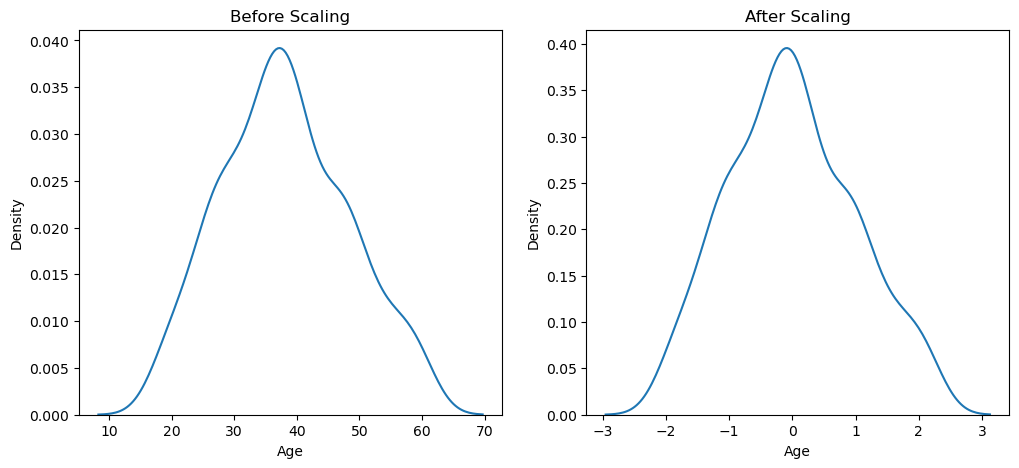

In [18]:
fig, (ax1,ax2) = plt.subplots(ncols = 2,figsize = (12,5))

# Before Scaling
ax1.set_title("Before Scaling")
sns.kdeplot(x_train["Age"], ax = ax1)

# After Scaling
ax2.set_title("After Scaling")
sns.kdeplot(x_train_scaled["Age"],ax = ax2)

plt.show()

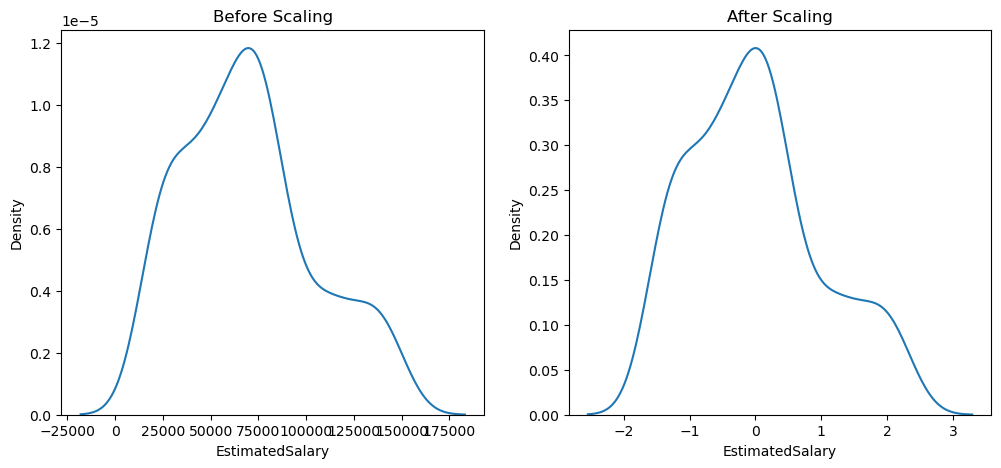

In [19]:
fig, (ax1,ax2) = plt.subplots(ncols = 2,figsize = (12,5))

# Before Scaling
ax1.set_title("Before Scaling")
sns.kdeplot(x_train["EstimatedSalary"],ax = ax1)

# After Scaling
ax2.set_title("After Scaling")
sns.kdeplot(x_train_scaled["EstimatedSalary"], ax = ax2)

plt.show()

Why scalling is important?

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [22]:
lr.fit(x_train,y_train)
lr_scaled.fit(x_train_scaled,y_train)

LogisticRegression()

In [23]:
y_pred = lr.predict(x_test)
y_pred_scaled = lr_scaled.predict(x_test_scaled)

In [24]:
from sklearn.metrics import accuracy_score

In [25]:
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.89
Scaled 0.89


In [26]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

In [27]:
dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()

In [28]:
dt.fit(x_train,y_train)
dt_scaled.fit(x_train_scaled,y_train)

DecisionTreeClassifier()

In [29]:
y_pred = dt.predict(x_test)
y_pred_scaled = dt_scaled.predict(x_test_scaled)

In [30]:
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.91
Scaled 0.89


In [31]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


Effect of Outlier

In [32]:
df = pd.concat([df, pd.DataFrame({"Age": [5, 90, 95], "EstimatedSalary": [1000, 250000, 350000], "Purchased": [0, 1, 1]})], ignore_index=True)

In [33]:
df.describe()

,Age,EstimatedSalary,Purchased
count,403.000000,403.000000,403.000000
mean,37.846154,70714.640199,0.359801
std,11.255343,37959.790969,0.480539
min,5.000000,1000.000000,0.000000
25%,29.500000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,95.000000,350000.000000,1.000000


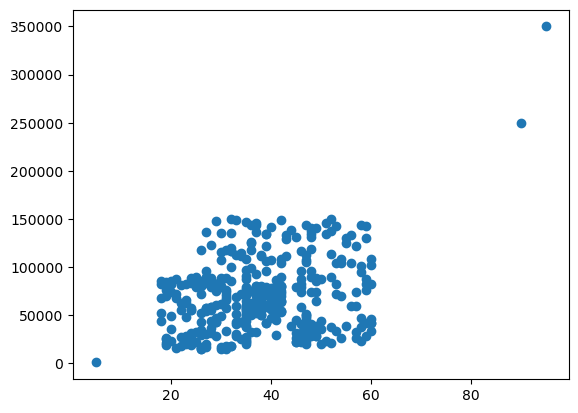

In [34]:
plt.scatter(df["Age"],df["EstimatedSalary"])

In [35]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df.drop("Purchased",axis = 1), df["Purchased"],test_size = 0.25,random_state=0)

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# train the parameter for standraztion
scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [37]:
scaler.mean_

array([3.83278146e+01, 6.93675497e+04])

In [38]:
x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled,columns=x_test.columns)

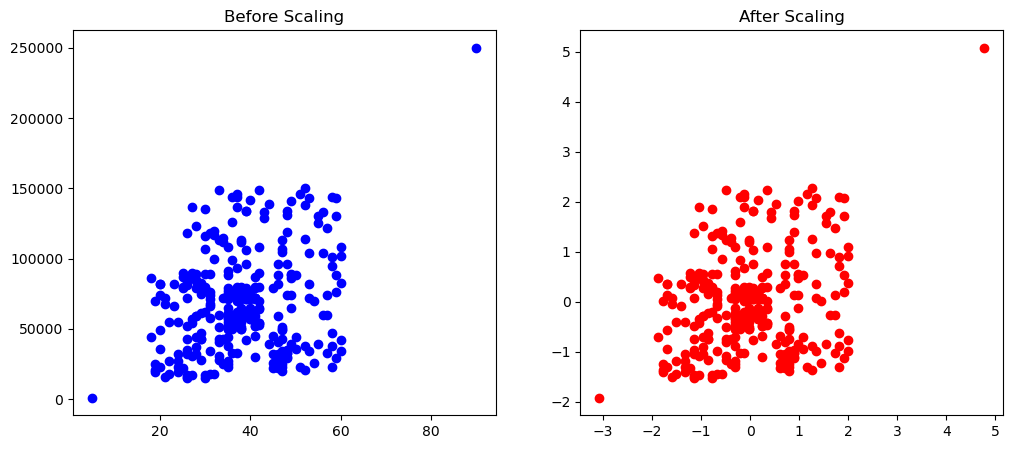

In [39]:
fig, (ax1,ax2) = plt.subplots(ncols = 2,figsize = (12,5))

ax1.scatter(x_train["Age"],x_train["EstimatedSalary"],c = "b")
ax1.set_title("Before Scaling")
ax2.scatter(x_train_scaled["Age"],x_train_scaled["EstimatedSalary"],c = "r")
ax2.set_title("After Scaling")
plt.show()

"Not Effect in outliers too"

**Normalization**

In [48]:
df = pd.read_csv(r"C:\\Users\\Krishna Baraskar\\Downloads\\Wine dataset.csv",usecols = ["class","Alcohol","Malic acid"])
df

,class,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59
...,...,...,...
173,3,13.71,5.65
174,3,13.40,3.91
175,3,13.27,4.28
176,3,13.17,2.59


<Axes: xlabel='Alcohol', ylabel='Density'>

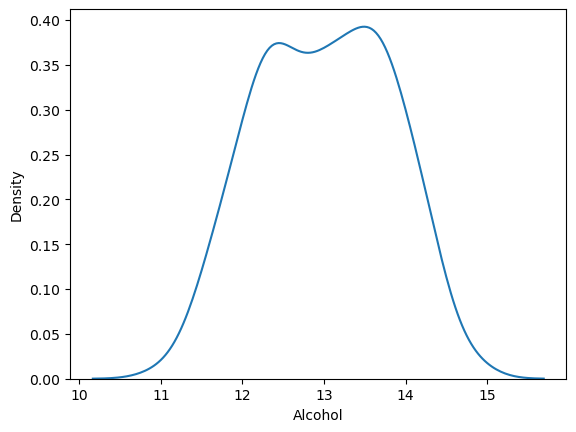

In [49]:
sns.kdeplot(df["Alcohol"])

<Axes: xlabel='Malic acid', ylabel='Density'>

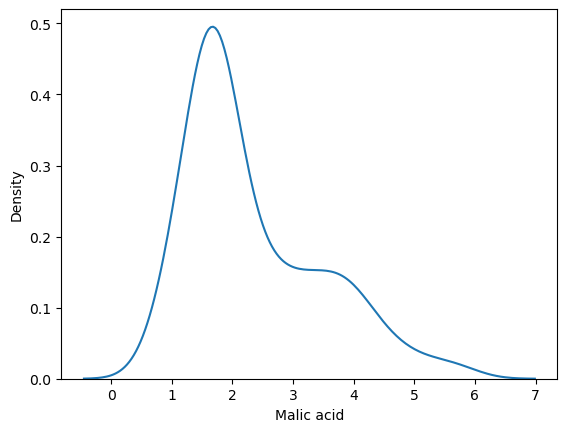

In [50]:
sns.kdeplot(df["Malic acid"])

<Axes: xlabel='class', ylabel='Density'>

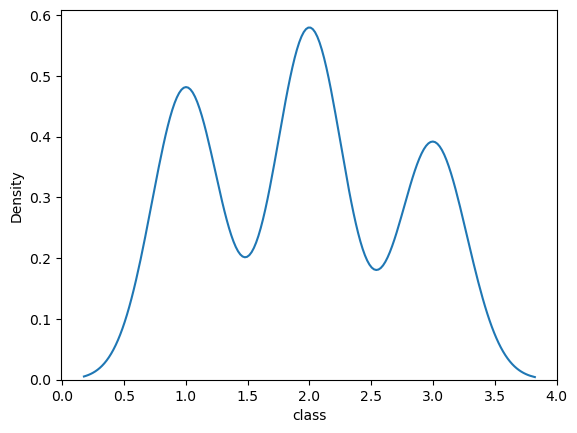

In [51]:
sns.kdeplot(df["class"])

<Axes: xlabel='Alcohol', ylabel='Malic acid'>

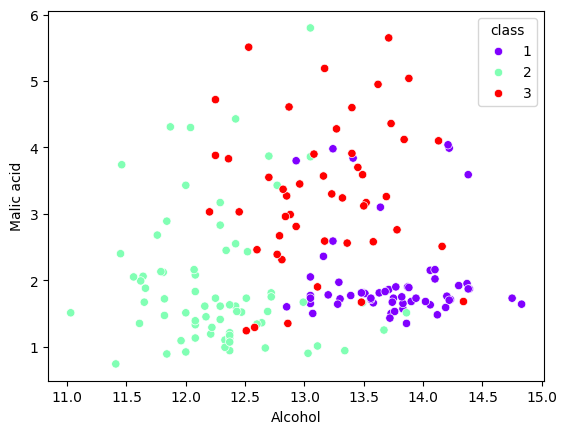

In [55]:
sns.scatterplot(x = "Alcohol",y = "Malic acid",hue = df["class"],palette="rainbow",data = df)

In [56]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df.drop("class",axis=1),df["class"],test_size=0.25)

In [57]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((133, 2), (45, 2), (133,), (45,))

In [59]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler to the train set, it will learn the parameter
scaler.fit(x_train)

# transform train and test sets
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
x_train_scaled.head()

In [ ]:
x_test_scaled.head()

In [60]:
x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=x_test.columns)

In [64]:
x_train_scaled.head()

,Alcohol,Malic acid
0,0.368421,0.156126
1,0.721053,0.229249
2,0.665789,0.191700
3,0.539474,0.624506
4,0.750000,0.227273


In [63]:
x_test_scaled.head()

,Alcohol,Malic acid
0,0.515789,0.183794
1,0.592105,0.177866
2,0.739474,0.667984
3,0.744737,0.152174
4,0.713158,0.183794


In [66]:
round(x_train.describe(),2)

,Alcohol,Malic acid
count,133.00,133.00
mean,12.95,2.31
std,0.83,1.07
min,11.03,0.74
25%,12.34,1.60
50%,12.93,1.87
75%,13.56,3.10
max,14.83,5.80


In [67]:
round(x_train_scaled.describe(),2)

,Alcohol,Malic acid
count,133.00,133.00
mean,0.51,0.31
std,0.22,0.21
min,0.00,0.00
25%,0.34,0.17
50%,0.50,0.22
75%,0.67,0.47
max,1.00,1.00


In Feacture scalling after doing Normalization min-max All values are lies in 0 to 1

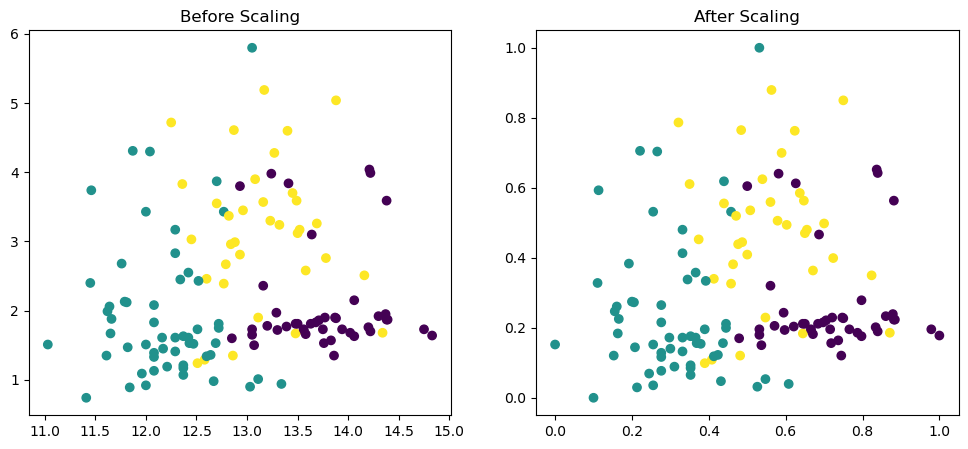

In [70]:
fig, (ax1,ax2) = plt.subplots(ncols = 2,figsize = (12,5))

ax1.scatter(x_train["Alcohol"],x_train["Malic acid"],c = y_train)
ax1.set_title("Before Scaling")
ax2.scatter(x_train_scaled["Alcohol"],x_train_scaled["Malic acid"],c = y_train)
ax2.set_title("After Scaling")
plt.show()

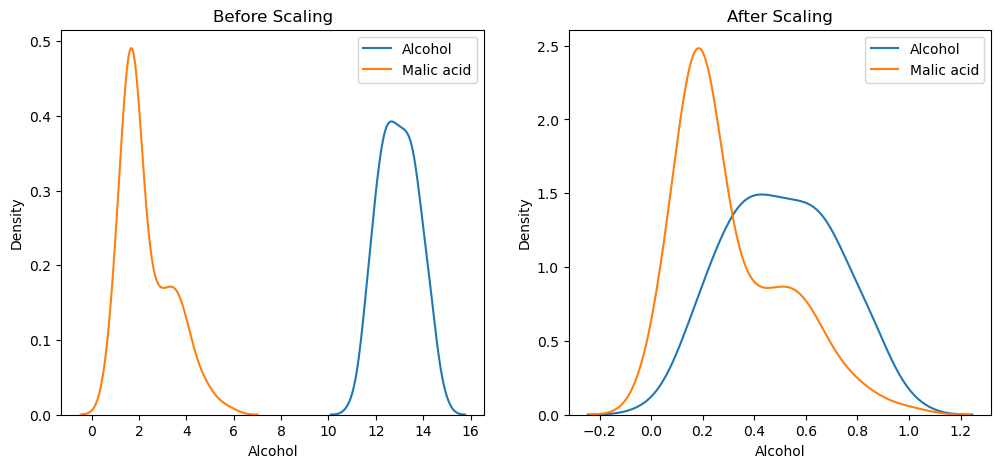

In [76]:
fig, (ax1,ax2) = plt.subplots(ncols = 2,figsize = (12,5))

# before scaling
sns.kdeplot(x_train["Alcohol"],ax=ax1,label = "Alcohol")
sns.kdeplot(x_train["Malic acid"],ax = ax1, label = "Malic acid")
ax1.set_title("Before Scaling")
ax1.legend()

sns.kdeplot(x_train_scaled["Alcohol"],ax=ax2,label = "Alcohol")
sns.kdeplot(x_train_scaled["Malic acid"],ax = ax2,label = "Malic acid")
ax2.set_title("After Scaling")
ax2.legend()
plt.show()
# sns.kdeplot(df["Alcohol"])

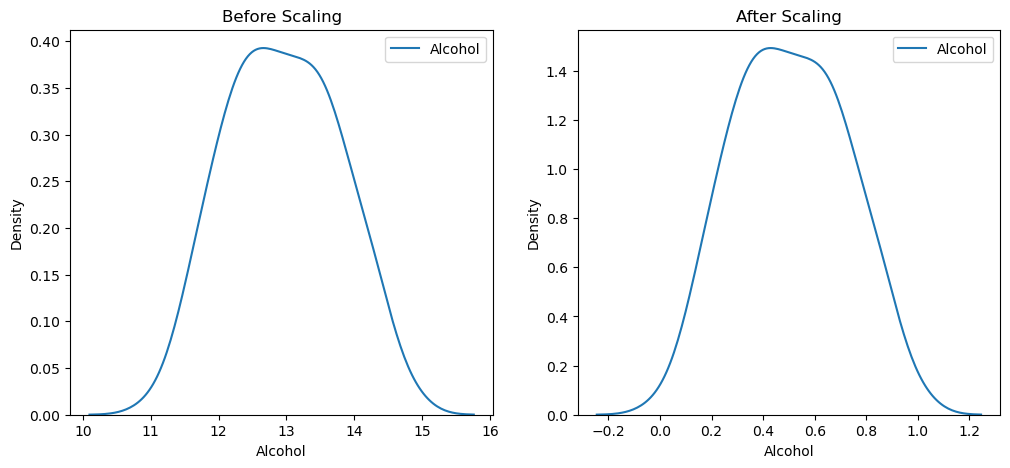

In [77]:
fig, (ax1,ax2) = plt.subplots(ncols = 2,figsize = (12,5))

# before scaling
sns.kdeplot(x_train["Alcohol"],ax=ax1,label = "Alcohol")
ax1.set_title("Before Scaling")
ax1.legend()

sns.kdeplot(x_train_scaled["Alcohol"],ax=ax2,label = "Alcohol")
ax2.set_title("After Scaling")
ax2.legend()
plt.show()
# sns.kdeplot(df["Alcohol"])

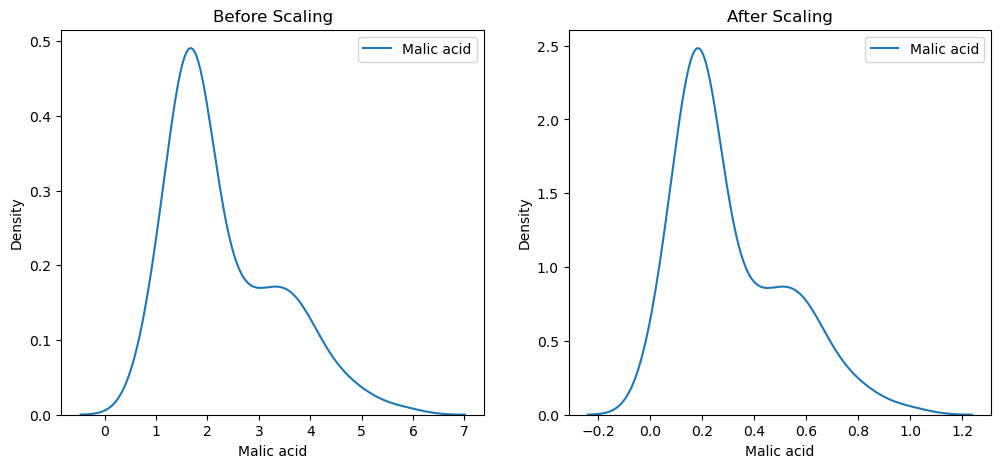

In [78]:
fig, (ax1,ax2) = plt.subplots(ncols = 2,figsize = (12,5))

# before scaling
sns.kdeplot(x_train["Malic acid"],ax = ax1, label = "Malic acid")
ax1.set_title("Before Scaling")
ax1.legend()

sns.kdeplot(x_train_scaled["Malic acid"],ax = ax2,label = "Malic acid")
ax2.set_title("After Scaling")
ax2.legend()
plt.show()
# sns.kdeplot(df["Alcohol"])